In [2]:
import pandas as pd 
import numpy as np
import matplotlib 
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [3]:
train_df = pd.read_csv('../../datasets/titanic_train.csv')
test_df = pd.read_csv('../../datasets/titanic_test.csv')
train_df.shape,test_df.shape
ids = test_df['PassengerId']

<AxesSubplot:>

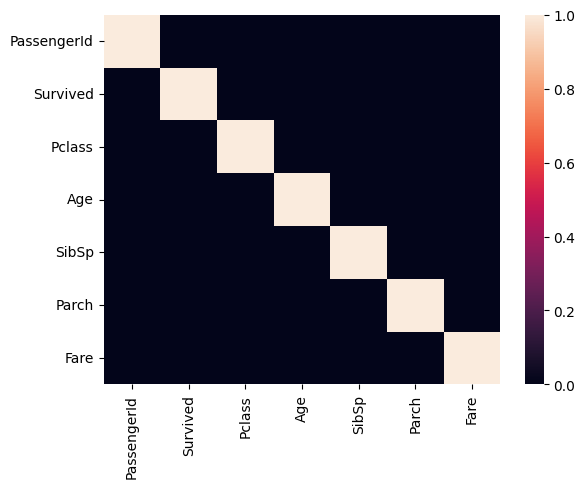

In [4]:
sns.heatmap(train_df.corr() > 0.5)

<AxesSubplot:>

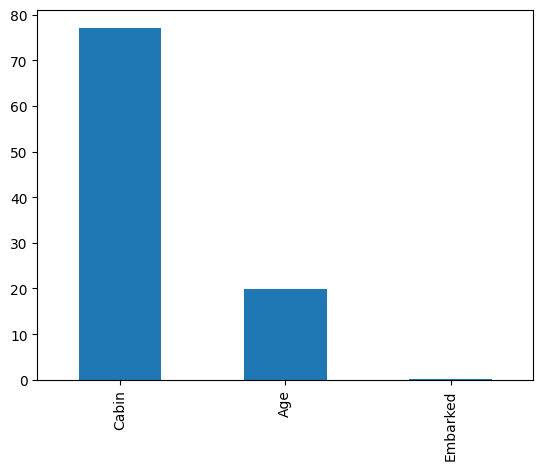

In [5]:
miss_values = train_df.isna().sum()[train_df.isna().sum() > 0 ].sort_values(ascending=False) * 100 / len(train_df['Age'])
miss_values.plot.bar()

In [6]:
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/home/vlad/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

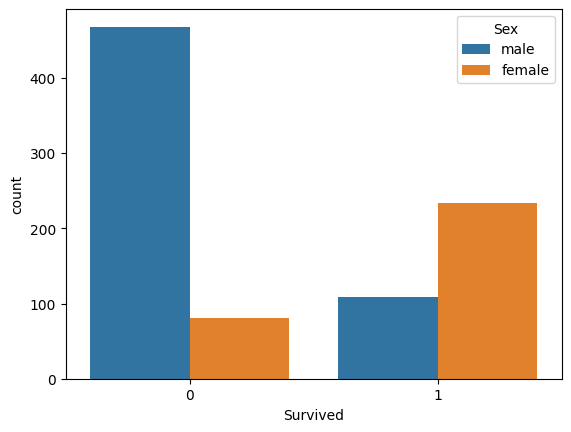

In [7]:
sns.countplot('Survived', data=train_df,hue='Sex',)

/home/vlad/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

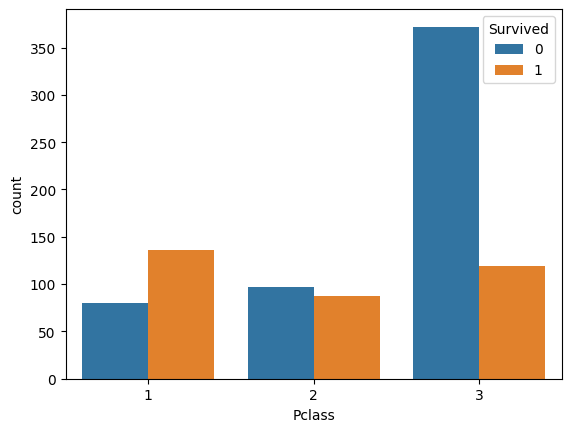

In [8]:
sns.countplot('Pclass', data=train_df,hue='Survived',)

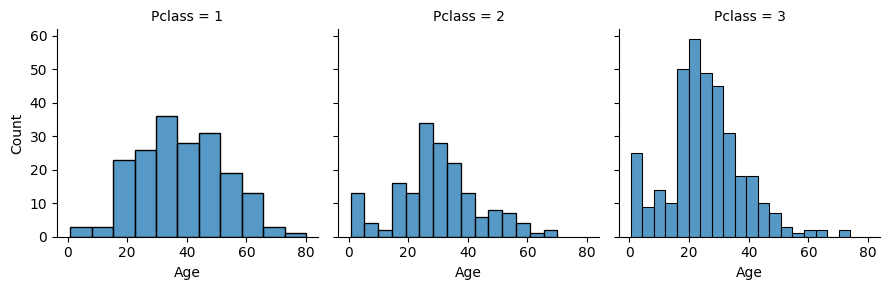

In [9]:
g = sns.FacetGrid(train_df,col='Pclass')
g.map(sns.histplot,'Age', data=train_df)

/home/vlad/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


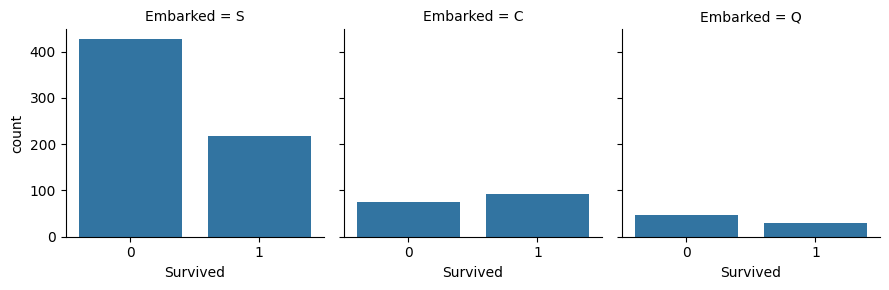

In [10]:
g = sns.FacetGrid(train_df,col='Embarked')
g.map(sns.countplot,'Survived', data=train_df)

In [11]:
merged_df = pd.concat([train_df, test_df])

In [12]:
def rm_miss(df):
    data1 = df.copy()
    data1.drop(['Name', 'Ticket','Cabin','PassengerId'],axis=1,inplace=True)
    
    data1['Embarked'] = data1['Embarked'].fillna('S')
    data1['Age'] = data1['Age'].fillna(data1['Age'].median())
    
    return data1
merged_df = rm_miss(merged_df)

In [13]:
pd.get_dummies(merged_df['Embarked'],drop_first=True).shape, merged_df['Embarked'].shape

((1309, 2), (1309,))

In [14]:
merged_df = pd.get_dummies(merged_df, drop_first=True)
merged_df

train_df = merged_df[~merged_df['Survived'].isna()]
test_df = merged_df[merged_df['Survived'].isna()]

In [15]:
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [20]:
y = train_df['Survived'].copy()

train_df.drop(['Survived'], axis=1, inplace=True)
test_df.drop(['Survived'], axis=1, inplace=True)

KeyError: 'Survived'

In [ ]:
train_df

In [ ]:
valid_df = pd.DataFrame()

xgb = XGBClassifier(max_depth=5,n_estimators=100)

X = train_df

bagging_xgb = BaggingClassifier(xgb, n_estimators=50)

#bagging_xgb.fit(X,y)

In [21]:
X.values

array([[ 3., 22.,  1., ...,  1.,  0.,  1.],
       [ 1., 38.,  1., ...,  0.,  0.,  0.],
       [ 3., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 3., 28.,  1., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  1.,  0.,  0.],
       [ 3., 32.,  0., ...,  1.,  1.,  0.]])

In [ ]:
roc_auc_score(y,bagging_xgb.predict(train_df))

In [ ]:
outputs = pd.DataFrame({'PassengerId':ids,'Survived':bagging_xgb.predict(test_df).astype(np.int64)})

In [135]:
outputs.to_csv('submition_titanic4.csv', index=False)